In [1]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
# Read the file.

annual = pd.read_csv(r"C:\Users\Fahim\Desktop\NAIM\pranjal\annual_csv.csv")

In [138]:
# Check the head records.

annual.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [139]:
# Check the shape of given data.

annual.shape

(70, 2)

In [140]:
# Convert the data into logarithmic form.

annual_log = np.log(annual.Price)

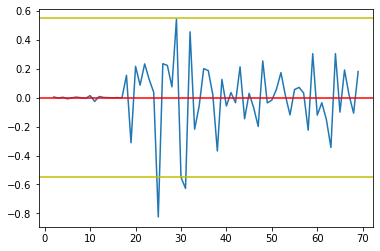

In [141]:
# Plot the data, by differencing. 

plt.plot(annual_log.diff().diff())
plt.axhline( y = 0 , color = 'r')
plt.axhline( y = 0.55, color = 'y')
plt.axhline( y = -0.55, color = 'y')

In [142]:
# Import the new library.

from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

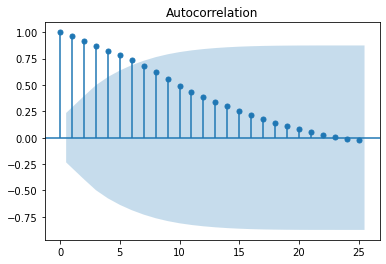

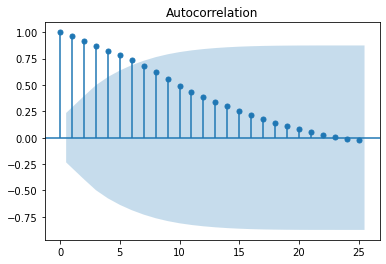

In [143]:
# Plot the data for ACF

plot_acf(annual_log , lags=25)

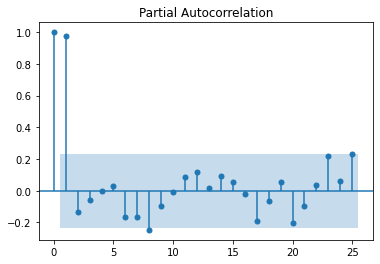

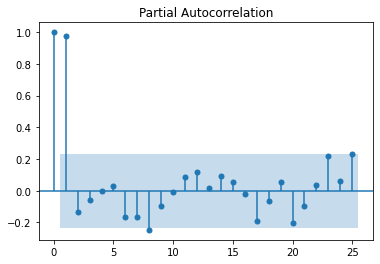

In [144]:
# Plot the the data for PACF

plot_pacf(annual_log , lags=25)

In [145]:
# As from above ploting, there is sudden drop in PACF plot, hence we can conclude that, its an AR(2) series
# order( 2 , 5 , 0)
# where ar = 2 , diff = 5 , ma = 0

In [146]:
# Import the library.

from statsmodels.tsa.arima_model import ARIMA

In [147]:
# Build the model.

model_annual = ARIMA(annual_log , order=(2, 2, 0))



# Note : Your 'd' value can not be greater than 'AR' value. It shows you the error.

C:\Users\Fahim\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [148]:
# Fit the model.

annual_result = model_annual.fit()

In [149]:
# Check the parameters

annual_result.params

const             0.001788
ar.L1.D2.Price   -0.321222
ar.L2.D2.Price   -0.270514
dtype: float64

In [150]:
# Predict the next 5 values 

forecast_annual_values = annual_result.forecast(steps = 5)
forecast_annual_values


# in this steps  = 5 , we are asking for next 5 predicted values 

(array([7.44215931, 7.54680068, 7.67361154, 7.80634656, 7.93402757]),
 array([0.20290974, 0.39649489, 0.59558   , 0.82905826, 1.09092363]),
 array([[ 7.04446352,  7.8398551 ],
        [ 6.76968497,  8.32391638],
        [ 6.50629619,  8.8409269 ],
        [ 6.18142223,  9.43127089],
        [ 5.79585655, 10.07219858]]))

In [151]:
# Pick up the only predicted values from above o/p

forecast_annual_values[0]

array([7.44215931, 7.54680068, 7.67361154, 7.80634656, 7.93402757])

In [152]:
# Convert the above logarithmic values into original form. 

forecasted_original_annual_result = np.exp(forecast_annual_values[0])
forecasted_original_annual_result

array([1706.43096493, 1894.67135774, 2150.8352686 , 2456.14066691,
       2790.6437015 ])

In [153]:
# We can compare with tail 6 values to check out verify out prediction is in right way.

annual.tail()

,Date,Price
65,2015-12,1068.317
66,2016-12,1152.165
67,2017-12,1265.674
68,2018-12,1249.887
69,2019-12,1480.025
